In [7]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
# read first n rows and columns
filename = 'GarmonData.csv'

df = pd.read_csv(filename, skiprows=0, usecols = ['DATEUTC','ID','LAT','LON','TEMPC','SOLARRADIATION','UV','WINDSPEEDKMH','WINDDIR','RAININ'])

In [9]:
df_pruned = df.drop_duplicates('ID')
print(df_pruned)
print(df_pruned[0:1])
# print(df_pruned.dtypes)
# print(df_pruned.index[0])

                     DATEUTC         ID        LAT       LON  TEMPC  WINDDIR  \
0        2019-06-20 18:50:00  GARMON002  50.846792  4.755860   19.7      NaN   
63102    2019-06-21 10:35:00  GARMON004  50.870755  4.685430   22.4      NaN   
124098   2019-06-24 12:45:00  GARMON005  50.881346  4.712534   25.6      NaN   
179994   2019-06-22 07:40:00  GARMON006  50.912292  4.715563   15.8      NaN   
238472   2019-06-22 09:05:00  GARMON007  50.869166  4.704765   24.5      NaN   
...                      ...        ...        ...       ...    ...      ...   
3432659  2019-10-21 12:35:00  GARMON094  50.881952  4.702507   13.7    101.0   
3462696  2020-01-16 12:25:00  GARMON096  50.885465  4.677504   16.6    264.0   
3464375  2019-10-21 12:35:00  GARMON097  50.866657  4.710121   13.5     77.0   
3494166  2019-10-21 12:35:00  GARMON098  50.882074  4.702959   13.7    101.0   
3524203  2019-10-31 12:20:00  GARMON099  50.881479  4.714405   19.7    185.0   

         WINDSPEEDKMH  RAININ  SOLARRAD

In [70]:
lat_min = np.min(df['LAT'])
lat_max = np.max(df['LAT'])
lon_min = np.min(df['LON'])
lon_max = np.max(df['LON'])
print('lat: '+str(lat_min)+' - '+str(lat_max))
print('lon: '+str(lon_min)+' - '+str(lon_max))

lat: 50.846792 - 50.937804
lon: 4.654269 - 4.789127


In [119]:
lat_star = 50.884406
lon_star = 4.693768
date_star = '2019-08-04' 
quantity = 'WINDDIR'
ith_closest = 4 # 0-4 choose one of the 5 closest

In [120]:
dists = (df_pruned['LAT']-lat_star)**2 + (df_pruned['LON']-lon_star)**2
print(dists)
idxs_ = dists.nsmallest(5).index
#idx_star = dists.idxmin() #choose one of the closest instead
idx_star = idxs_[ith_closest]
print(idx_star, idxs_[0])
print(df_pruned.loc[idx_star])

0          0.005270
63102      0.000256
124098     0.000362
179994     0.001253
238472     0.000353
             ...   
3432659    0.000082
3462696    0.000266
3464375    0.000582
3494166    0.000090
3524203    0.000434
Length: 78, dtype: float64
937657 724514
DATEUTC           2019-07-06 13:30:00
ID                          GARMON029
LAT                           50.8838
LON                           4.68821
TEMPC                            32.2
WINDDIR                           NaN
WINDSPEEDKMH                        0
RAININ                              0
SOLARRADIATION                 166.09
UV                                  1
Name: 937657, dtype: object


In [121]:
id_star = df_pruned.loc[idx_star]['ID']
print(id_star)

GARMON029


In [122]:
df_id = df[df['ID'] == id_star]

In [123]:
print(df_id)
print(df_id['DATEUTC'])

                    DATEUTC         ID        LAT       LON  TEMPC  WINDDIR  \
937657  2019-07-06 13:30:00  GARMON029  50.883836  4.688209   32.2      NaN   
937658  2019-07-06 13:35:00  GARMON029  50.883836  4.688209   32.3      NaN   
937659  2019-07-06 13:40:00  GARMON029  50.883836  4.688209   32.4      NaN   
937660  2019-07-06 13:45:00  GARMON029  50.883836  4.688209   32.4      NaN   
937661  2019-07-06 13:50:00  GARMON029  50.883836  4.688209   32.4      NaN   
...                     ...        ...        ...       ...    ...      ...   
979148  2020-02-02 23:35:00  GARMON029  50.883836  4.688209   10.8    241.0   
979149  2020-02-02 23:40:00  GARMON029  50.883836  4.688209   10.8    232.0   
979150  2020-02-02 23:45:00  GARMON029  50.883836  4.688209   10.8    241.0   
979151  2020-02-02 23:50:00  GARMON029  50.883836  4.688209   10.8    268.0   
979152  2020-02-02 23:55:00  GARMON029  50.883836  4.688209   10.8    233.0   

        WINDSPEEDKMH  RAININ  SOLARRADIATION   UV  

In [124]:
df_date = df_id[df_id['DATEUTC'].str.contains(date_star)]
print(df_date)

                    DATEUTC         ID        LAT       LON  TEMPC  WINDDIR  \
940542  2019-08-04 00:00:00  GARMON029  50.883836  4.688209   16.0      NaN   
940543  2019-08-04 00:05:00  GARMON029  50.883836  4.688209   15.9      NaN   
940544  2019-08-04 00:10:00  GARMON029  50.883836  4.688209   15.8      NaN   
940545  2019-08-04 00:15:00  GARMON029  50.883836  4.688209   15.8      NaN   
940546  2019-08-04 00:20:00  GARMON029  50.883836  4.688209   15.7      NaN   
...                     ...        ...        ...       ...    ...      ...   
940650  2019-08-04 23:05:00  GARMON029  50.883836  4.688209   21.9      NaN   
940651  2019-08-04 23:10:00  GARMON029  50.883836  4.688209   21.9      NaN   
940652  2019-08-04 23:45:00  GARMON029  50.883836  4.688209   21.9      NaN   
940653  2019-08-04 23:50:00  GARMON029  50.883836  4.688209   21.9      NaN   
940654  2019-08-04 23:55:00  GARMON029  50.883836  4.688209   21.9      NaN   

        WINDSPEEDKMH  RAININ  SOLARRADIATION   UV  

Text(0.5, 0.98, 'GARMON029')

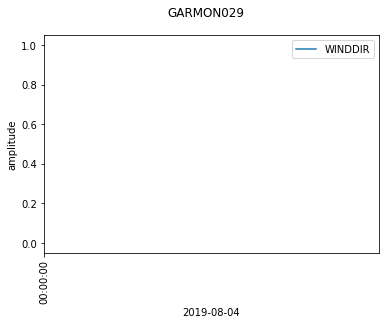

In [125]:
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(df_date[quantity], label=quantity)
ax.legend()
ax.set_xlabel(date_star)
ax.set_ylabel('amplitude')
ax.set_xticklabels(df_date['DATEUTC'].str.slice(start=11), rotation='vertical')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
fig.suptitle(id_star)

In [126]:
print(df_date['DATEUTC'].str.slice(start=11))

940542    00:00:00
940543    00:05:00
940544    00:10:00
940545    00:15:00
940546    00:20:00
            ...   
940650    23:05:00
940651    23:10:00
940652    23:45:00
940653    23:50:00
940654    23:55:00
Name: DATEUTC, Length: 113, dtype: object
